#Prerequisite

In [24]:
!pip install scikit-learn-intelex

In [25]:
import os
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [26]:
from sklearn.ensemble import VotingClassifier

In [27]:
#from google.colab import drive
!gdown 1d-n3DRMh8YZwAd5pxryRZMiqLKH4dPPo
!gdown 1GzBgV34sITnhenBS-E21ZvQ9MU8SwMMa
#drive.mount('/content/drive')

Downloading...
From: https://drive.google.com/uc?id=1d-n3DRMh8YZwAd5pxryRZMiqLKH4dPPo
To: /content/labels1.csv
100% 3.89k/3.89k [00:00<00:00, 10.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GzBgV34sITnhenBS-E21ZvQ9MU8SwMMa
To: /content/data1.csv
100% 824M/824M [00:07<00:00, 107MB/s] 


In [28]:
data = pd.read_csv("/content/data1.csv")

In [29]:
labels = pd.read_csv("/content/labels1.csv")

In [30]:
data.info

<bound method DataFrame.info of                         Unnamed: 0  ENSG00000000003.15  ENSG00000000005.6  \
0     TCGA-AJ-A3NH-11A-11R-A22K-07            1.565076           0.066810   
1     TCGA-AX-A05Y-11A-11R-A27V-07            0.975542           0.159958   
2     TCGA-FL-A1YN-11A-11R-A32Y-07            1.277174           0.058654   
3     TCGA-FL-A1YU-11A-11R-A32Y-07            1.319747           0.039811   
4     TCGA-AJ-A3NC-11A-11R-A22K-07            1.017179           0.158393   
...                            ...                 ...                ...   
1292  TCGA-JY-A93C-01A-11R-A38D-31            1.536423           0.003977   
1293  TCGA-JY-A6FH-01A-11R-A336-31            0.789686           0.003762   
1294  TCGA-L5-A8NF-01A-11R-A37I-31            0.755745           0.000000   
1295  TCGA-VR-AA4D-01A-11R-A37I-31            1.252630           0.007961   
1296  TCGA-IG-A3QL-01A-11R-A24K-31            1.400346           0.003331   

      ENSG00000000419.13  ENSG00000000457.1

In [31]:
labels.info

<bound method DataFrame.info of       0
0     0
1     0
2     0
3     0
4     0
...  ..
1291  4
1292  4
1293  4
1294  4
1295  4

[1296 rows x 1 columns]>

In [32]:
columns_to_remove = []
for i in range(len(data.columns)):
  if(data.columns[i].find("Unnamed")>=0):
    columns_to_remove.append(data.columns[i])
data = data.drop(labels = columns_to_remove, axis = 1, inplace = False)

# this removes any row that has even a single null value
#data = data.dropna()

# To remove only the rows where all values are null
#data = data.dropna(how='all')

# Remove rows with null values only in the 'column_name' column
#data = data.dropna(subset=['column_name'])

In [33]:
X = data.values
y = labels.values
X = X[:-1]
print("(Dataset) (Label):",X.shape,y.shape)

(Dataset) (Label): (1296, 60660) (1296, 1)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =7, shuffle = True, stratify = y)
# We need random_state so that using that same seed, we can reproduce the exact same results later
# We need startify to balance the split. Else, the train data might have too many values of a particular class,
# and too less value of another class. This can later on create overfitting or underfitting

# Print dimension of training/test dataset and labels.
print("Train Set: ",X_train.shape,y_train.shape)
print("Test Set: ",X_test.shape,y_test.shape)

Train Set:  (1036, 60660) (1036, 1)
Test Set:  (260, 60660) (260, 1)


In [35]:
# Normalize Standardize features by removing the mean and scaling to unit variance.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

#Logistic Regression

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Logistic Regression model
modelLR = LogisticRegression(max_iter=500, C=20, penalty="l2", random_state=27, solver="lbfgs")
fit = modelLR.fit(X_train, np.ravel(y_train))

# Make predictions on the test set
y_predLR = modelLR.predict(X_test)

# Calculate and print accuracy
accuracyLR = accuracy_score(y_test, y_predLR)
print("Accuracy: {:.2f}%".format(accuracyLR * 100))

# Calculate and print macro precision
macro_precision = precision_score(y_test, y_predLR, average='macro')
print("Macro Precision: {:.4f}".format(macro_precision))

# Calculate and print weighted precision
weighted_precision = precision_score(y_test, y_predLR, average='weighted')
print("Weighted Precision: {:.4f}".format(weighted_precision))

# Calculate and print macro recall
macro_recall = recall_score(y_test, y_predLR, average='macro')
print("Macro Recall: {:.4f}".format(macro_recall))

# Calculate and print weighted recall
weighted_recall = recall_score(y_test, y_predLR, average='weighted')
print("Weighted Recall: {:.4f}".format(weighted_recall))

# Calculate and print macro F1-score
macro_f1 = f1_score(y_test, y_predLR, average='macro')
print("Macro F1-Score: {:.4f}".format(macro_f1))

# Calculate and print weighted F1-score
weighted_f1 = f1_score(y_test, y_predLR, average='weighted')
print("Weighted F1-Score: {:.4f}".format(weighted_f1))

# Display confusion matrix
cf_matrixLR = confusion_matrix(y_test, y_predLR)
print("\nConfusion Matrix:")
print(cf_matrixLR)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_predLR, digits=4))

Accuracy: 98.08%
Macro Precision: 0.9582
Weighted Precision: 0.9820
Macro Recall: 0.9812
Weighted Recall: 0.9808
Macro F1-Score: 0.9690
Weighted F1-Score: 0.9809

Confusion Matrix:
[[ 24   0   0   0   1]
 [  0 111   0   0   0]
 [  0   0  13   0   0]
 [  3   0   1  70   0]
 [  0   0   0   0  37]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8889    0.9600    0.9231        25
           1     1.0000    1.0000    1.0000       111
           2     0.9286    1.0000    0.9630        13
           3     1.0000    0.9459    0.9722        74
           4     0.9737    1.0000    0.9867        37

    accuracy                         0.9808       260
   macro avg     0.9582    0.9812    0.9690       260
weighted avg     0.9820    0.9808    0.9809       260



#Random Forest

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier

# Initialize the Logistic Regression model
#modelRF = RandomForestClassifier(n_estimators = 100, criterion="entropy", min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 50, bootstrap=False, n_jobs=-1)

# Reduce the number of estimators for RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=50, criterion="entropy", min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=50, bootstrap=False, n_jobs=-1)


# n_estimators -> number of trees in the forest
# criterion -> The function used to measure the quality of a split.
# min_sample_split -> The minimum number of samples required to split an internal node.
# min_samples_leaf -> The minimum number of samples required to be at a leaf node.
# max_features -> The number of features to consider when looking for the best split.
# max_depth -> The maximum depth of the tree.
# bootstrap -> Whether to use bootstrap samples when building trees.
# n_jobs -> The number of jobs to run in parallel for both fit and predict.

fit = modelRF.fit(X_train, np.ravel(y_train))

# Make predictions on the test set
y_predRF = modelRF.predict(X_test)

# Calculate and print accuracy
accuracyRF = accuracy_score(y_test, y_predRF)
print("Accuracy: {:.2f}%".format(accuracyRF * 100))

# Calculate and print macro precision
macro_precision = precision_score(y_test, y_predRF, average='macro')
print("Macro Precision: {:.4f}".format(macro_precision))

# Calculate and print weighted precision
weighted_precision = precision_score(y_test, y_predRF, average='weighted')
print("Weighted Precision: {:.4f}".format(weighted_precision))

# Calculate and print macro recall
macro_recall = recall_score(y_test, y_predRF, average='macro')
print("Macro Recall: {:.4f}".format(macro_recall))

# Calculate and print weighted recall
weighted_recall = recall_score(y_test, y_predRF, average='weighted')
print("Weighted Recall: {:.4f}".format(weighted_recall))

# Calculate and print macro F1-score
macro_f1 = f1_score(y_test, y_predRF, average='macro')
print("Macro F1-Score: {:.4f}".format(macro_f1))

# Calculate and print weighted F1-score
weighted_f1 = f1_score(y_test, y_predRF, average='weighted')
print("Weighted F1-Score: {:.4f}".format(weighted_f1))

# Display confusion matrix
cf_matrixRF = confusion_matrix(y_test, y_predRF)
print("\nConfusion Matrix:")
print(cf_matrixRF)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_predRF, digits=4))

Accuracy: 98.46%
Macro Precision: 0.9671
Weighted Precision: 0.9851
Macro Recall: 0.9786
Weighted Recall: 0.9846
Macro F1-Score: 0.9723
Weighted F1-Score: 0.9846

Confusion Matrix:
[[ 23   0   0   0   2]
 [  0 111   0   0   0]
 [  0   0  13   0   0]
 [  1   0   1  72   0]
 [  0   0   0   0  37]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9583    0.9200    0.9388        25
           1     1.0000    1.0000    1.0000       111
           2     0.9286    1.0000    0.9630        13
           3     1.0000    0.9730    0.9863        74
           4     0.9487    1.0000    0.9737        37

    accuracy                         0.9846       260
   macro avg     0.9671    0.9786    0.9723       260
weighted avg     0.9851    0.9846    0.9846       260



#Gradient Boosting

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Logistic Regression model
# model_XGBoost = XGBClassifier()

# Reduce the number of estimators for XGBClassifier
model_XGBoost = XGBClassifier(n_estimators=50)

fit = model_XGBoost.fit(X_train, np.ravel(y_train))

# Make predictions on the test set
y_predXGB = model_XGBoost.predict(X_test)

# Calculate and print accuracy
accuracyXGB = accuracy_score(y_test, y_predXGB)
print("Accuracy: {:.2f}%".format(accuracyXGB * 100))

# Calculate and print macro precision
macro_precision = precision_score(y_test, y_predXGB, average='macro')
print("Macro Precision: {:.4f}".format(macro_precision))

# Calculate and print weighted precision
weighted_precision = precision_score(y_test, y_predXGB, average='weighted')
print("Weighted Precision: {:.4f}".format(weighted_precision))

# Calculate and print macro recall
macro_recall = recall_score(y_test, y_predXGB, average='macro')
print("Macro Recall: {:.4f}".format(macro_recall))

# Calculate and print weighted recall
weighted_recall = recall_score(y_test, y_predXGB, average='weighted')
print("Weighted Recall: {:.4f}".format(weighted_recall))

# Calculate and print macro F1-score
macro_f1 = f1_score(y_test, y_predXGB, average='macro')
print("Macro F1-Score: {:.4f}".format(macro_f1))

# Calculate and print weighted F1-score
weighted_f1 = f1_score(y_test, y_predXGB, average='weighted')
print("Weighted F1-Score: {:.4f}".format(weighted_f1))

# Display confusion matrix
cf_matrixXGB = confusion_matrix(y_test, y_predXGB)
print("\nConfusion Matrix:")
print(cf_matrixXGB)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_predXGB, digits=4))

Accuracy: 98.46%
Macro Precision: 0.9671
Weighted Precision: 0.9851
Macro Recall: 0.9786
Weighted Recall: 0.9846
Macro F1-Score: 0.9723
Weighted F1-Score: 0.9846

Confusion Matrix:
[[ 23   0   0   0   2]
 [  0 111   0   0   0]
 [  0   0  13   0   0]
 [  1   0   1  72   0]
 [  0   0   0   0  37]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9583    0.9200    0.9388        25
           1     1.0000    1.0000    1.0000       111
           2     0.9286    1.0000    0.9630        13
           3     1.0000    0.9730    0.9863        74
           4     0.9487    1.0000    0.9737        37

    accuracy                         0.9846       260
   macro avg     0.9671    0.9786    0.9723       260
weighted avg     0.9851    0.9846    0.9846       260



#Max Voting Ensemble Learning

In [39]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples with model names and their instances
models = [('RandomForest', modelRF), ('LogisticRegression', modelLR), ('XGBoost', model_XGBoost)]

# Initialize the VotingClassifier with 'hard' voting
voting_clf = VotingClassifier(estimators=models, voting='hard')

# Fit the ensemble model on the training data
voting_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the test set
y_pred_ensemble = voting_clf.predict(X_test)

# Calculate and print accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Accuracy: {:.2f}%".format(accuracy_ensemble * 100))

Ensemble Accuracy: 98.08%


# Average Voting Ensemble Learning

In [40]:
proba_RF = modelRF.predict_proba(X_test)
proba_LR = modelLR.predict_proba(X_test)
proba_XGBoost =model_XGBoost.predict_proba(X_test)

# Perform averaging voting
average_proba = (proba_RF + proba_LR + proba_XGBoost) / 3

# Make predictions based on the average probabilities
y_pred_avg_ensemble = np.argmax(average_proba, axis=1)

accuracy_avg_ensemble = accuracy_score(y_test, y_pred_avg_ensemble)
print("Ensemble Accuracy: {:.2f}%".format(accuracy_avg_ensemble * 100))

Ensemble Accuracy: 98.85%


In [41]:
# print(list(proba_RF))

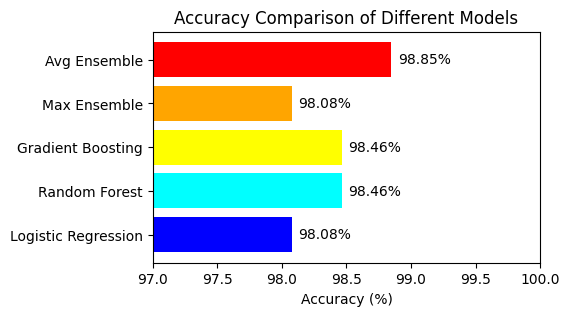

In [42]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Max Ensemble', 'Avg Ensemble']

# Corresponding accuracy values
accuracies = [val * 100 for val in [accuracyLR, accuracyRF, accuracyXGB, accuracy_ensemble, accuracy_avg_ensemble]]


# Plotting the horizontal bar chart
fig, ax = plt.subplots(figsize=(5, 3))
bars = ax.barh(models, accuracies, color=['blue', 'cyan', 'yellow', 'orange', 'red'])

# Display the exact accuracy values on the bars
for bar, accuracy in zip(bars, accuracies):
    ax.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2, f'{accuracy:.2f}%', va='center')

ax.set_xlabel('Accuracy (%)')
ax.set_title('Accuracy Comparison of Different Models')
plt.xlim(97, 100)  # Set the x-axis range if needed
plt.show()